# Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import networkx as nx

# Data Preperation
## Reading the dataset

In [17]:
csv_path = "../dataset/cleaned_data.csv"

dataset = pd.read_csv(csv_path)

dataset

Transaction ID Date of Purchase Time of Purchase  \
0      da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11   
1      b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01   
2      f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27   
3      b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36   
4      2be00b45-0762-485e-a7a3       2023-12-27         18:22:56   
...                        ...              ...              ...   
31648  1304623d-b8b7-4999-8e9c       2024-04-30         18:42:58   
31649  7da22246-f480-417c-bc2f       2024-04-30         18:46:10   
31650  add9debf-46c1-4c75-b52d       2024-04-30         18:56:41   
31651  b92b047c-21fd-4859-966a       2024-04-30         19:51:47   
31652  1d5d89a2-bde5-410f-8f91       2024-04-30         20:05:39   

      Purchase Type Payment Method Railcard Ticket Class Ticket Type  Price  \
0            Online    Contactless    Adult     Standard     Advance     43   
1           Station    Credit Card    Adult     Standard     Advance     23   
2            Online    Credit Card      NaN     Standard     Advance      3   
3           Station    Credit Card      NaN     Standard     Advance     13   
4            Online    Contactless      NaN     Standard     Advance     76   
...             ...            ...      ...          ...         ...    ...   
31648        Online    Credit Card      NaN     Standard    Off-Peak      4   
31649        Online    Contactless      NaN     Standard    Off-Peak     10   
31650       Station    Credit Card      NaN     Standard    Off-Peak      4   
31651       Station    Credit Card      NaN     Standard    Off-Peak     10   
31652       Station    Credit Card    Adult     Standard    Off-Peak      3   

           Departure Station  ... Date of Journey Departure Time Arrival Time  \
0          London Paddington  ...      2024-01-01       11:00:00     13:30:00   
1         London Kings Cross  ...      2024-01-01       09:45:00     11:35:00   
2      Liverpool Lime Street  ...      2024-01-02       18:15:00     18:45:00   
3          London Paddington  ...      2024-01-01       21:30:00     22:30:00   
4      Liverpool Lime Street  ...      2024-01-01       16:45:00     19:00:00   
...                      ...  ...             ...            ...          ...   
31648  Manchester Piccadilly  ...      2024-04-30       20:00:00     20:30:00   
31649          London Euston  ...      2024-04-30       20:15:00     21:35:00   
31650  Manchester Piccadilly  ...      2024-04-30       20:15:00     20:45:00   
31651          London Euston  ...      2024-04-30       21:15:00     22:35:00   
31652  Liverpool Lime Street  ...      2024-04-30       21:30:00     22:00:00   

      Actual Arrival Time Journey Status Reason for Delay Refund Request Day  \
0                13:30:00        On Time              NaN             No   1   
1                11:40:00        Delayed   Signal Failure             No   1   
2                18:45:00        On Time              NaN             No   2   
3                22:30:00        On Time              NaN             No   1   
4                19:00:00        On Time              NaN             No   1   
...                   ...            ...              ...            ...  ..   
31648            20:30:00        On Time              NaN             No  30   
31649            21:35:00        On Time              NaN             No  30   
31650            20:45:00        On Time              NaN             No  30   
31651            22:35:00        On Time              NaN             No  30   
31652            22:00:00        On Time              NaN             No  30   

       Month  Delay (min)  
0          1          NaN  
1          1          5.0  
2          1          NaN  
3          1          NaN  
4          1          NaN  
...      ...          ...  
31648      4          NaN  
31649      4          NaN  
31650      4          NaN  
31651      4          NaN  
31652   

In [18]:
df = pd.DataFrame(dataset)

df

Transaction ID Date of Purchase Time of Purchase  \
0      da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11   
1      b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01   
2      f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27   
3      b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36   
4      2be00b45-0762-485e-a7a3       2023-12-27         18:22:56   
...                        ...              ...              ...   
31648  1304623d-b8b7-4999-8e9c       2024-04-30         18:42:58   
31649  7da22246-f480-417c-bc2f       2024-04-30         18:46:10   
31650  add9debf-46c1-4c75-b52d       2024-04-30         18:56:41   
31651  b92b047c-21fd-4859-966a       2024-04-30         19:51:47   
31652  1d5d89a2-bde5-410f-8f91       2024-04-30         20:05:39   

      Purchase Type Payment Method Railcard Ticket Class Ticket Type  Price  \
0            Online    Contactless    Adult     Standard     Advance     43   
1           Station    Credit Card    Adult     Standard     Advance     23   
2            Online    Credit Card      NaN     Standard     Advance      3   
3           Station    Credit Card      NaN     Standard     Advance     13   
4            Online    Contactless      NaN     Standard     Advance     76   
...             ...            ...      ...          ...         ...    ...   
31648        Online    Credit Card      NaN     Standard    Off-Peak      4   
31649        Online    Contactless      NaN     Standard    Off-Peak     10   
31650       Station    Credit Card      NaN     Standard    Off-Peak      4   
31651       Station    Credit Card      NaN     Standard    Off-Peak     10   
31652       Station    Credit Card    Adult     Standard    Off-Peak      3   

           Departure Station  ... Date of Journey Departure Time Arrival Time  \
0          London Paddington  ...      2024-01-01       11:00:00     13:30:00   
1         London Kings Cross  ...      2024-01-01       09:45:00     11:35:00   
2      Liverpool Lime Street  ...      2024-01-02       18:15:00     18:45:00   
3          London Paddington  ...      2024-01-01       21:30:00     22:30:00   
4      Liverpool Lime Street  ...      2024-01-01       16:45:00     19:00:00   
...                      ...  ...             ...            ...          ...   
31648  Manchester Piccadilly  ...      2024-04-30       20:00:00     20:30:00   
31649          London Euston  ...      2024-04-30       20:15:00     21:35:00   
31650  Manchester Piccadilly  ...      2024-04-30       20:15:00     20:45:00   
31651          London Euston  ...      2024-04-30       21:15:00     22:35:00   
31652  Liverpool Lime Street  ...      2024-04-30       21:30:00     22:00:00   

      Actual Arrival Time Journey Status Reason for Delay Refund Request Day  \
0                13:30:00        On Time              NaN             No   1   
1                11:40:00        Delayed   Signal Failure             No   1   
2                18:45:00        On Time              NaN             No   2   
3                22:30:00        On Time              NaN             No   1   
4                19:00:00        On Time              NaN             No   1   
...                   ...            ...              ...            ...  ..   
31648            20:30:00        On Time              NaN             No  30   
31649            21:35:00        On Time              NaN             No  30   
31650            20:45:00        On Time              NaN             No  30   
31651            22:35:00        On Time              NaN             No  30   
31652            22:00:00        On Time              NaN             No  30   

       Month  Delay (min)  
0          1          NaN  
1          1          5.0  
2          1          NaN  
3          1          NaN  
4          1          NaN  
...      ...          ...  
31648      4          NaN  
31649      4          NaN  
31650      4          NaN  
31651      4          NaN  
31652   

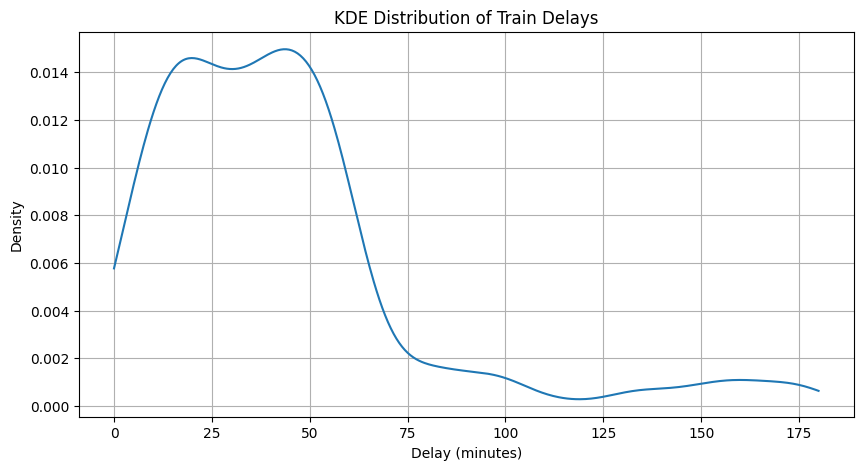

In [19]:
# Filter valid delay values
delay_data = df['Delay (min)'].dropna()

# KDE model
kde = gaussian_kde(delay_data)

# Range of values to evaluate KDE
x_vals = np.linspace(delay_data.min(), delay_data.max(), 500)
y_vals = kde(x_vals)

# Plot KDE
plt.figure(figsize=(10,5))
plt.plot(x_vals, y_vals)
plt.xlabel("Delay (minutes)")
plt.ylabel("Density")
plt.title("KDE Distribution of Train Delays")
plt.grid(True)
plt.show()

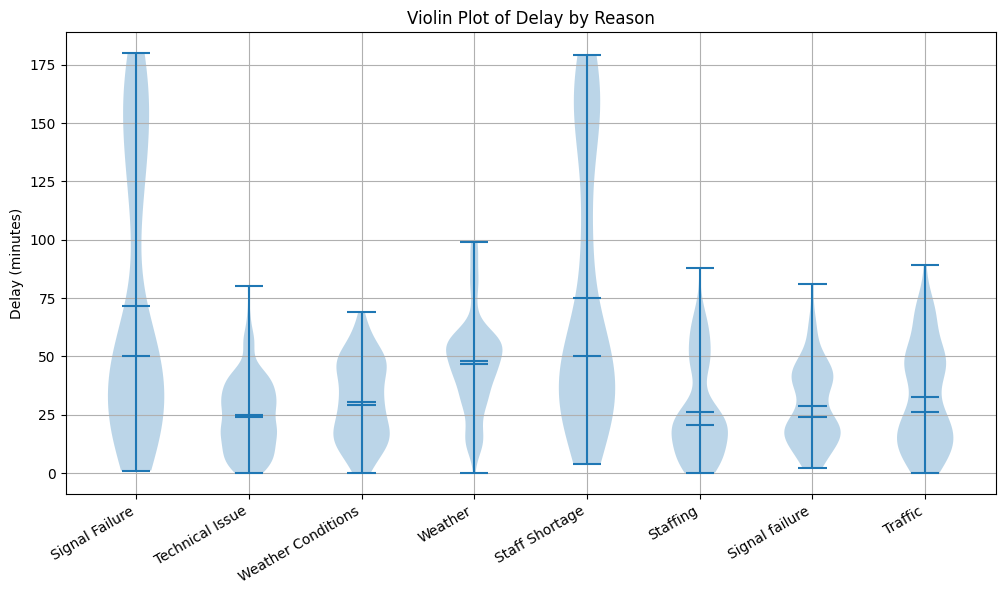

In [20]:
# Keep delayed rows only
delayed_df = df[df['Journey Status'] == 'Delayed']

# Group delays by reason
reasons = delayed_df['Reason for Delay'].unique()
data = [delayed_df[delayed_df['Reason for Delay'] == r]['Delay (min)'].dropna() for r in reasons]

# Plot violin
plt.figure(figsize=(12,6))
plt.violinplot(data, showmeans=True, showmedians=True)

# Set x-axis labels
plt.xticks(range(1, len(reasons)+1), reasons, rotation=30, ha='right')
plt.ylabel("Delay (minutes)")
plt.title("Violin Plot of Delay by Reason")
plt.grid(True)
plt.show()

/tmp/ipykernel_69053/1383833630.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  delays['Departure Hour'] = pd.to_datetime(delays['Departure Time']).dt.hour
/tmp/ipykernel_69053/1383833630.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['Departure Hour'] = pd.to_datetime(delays['Departure Time']).dt.hour


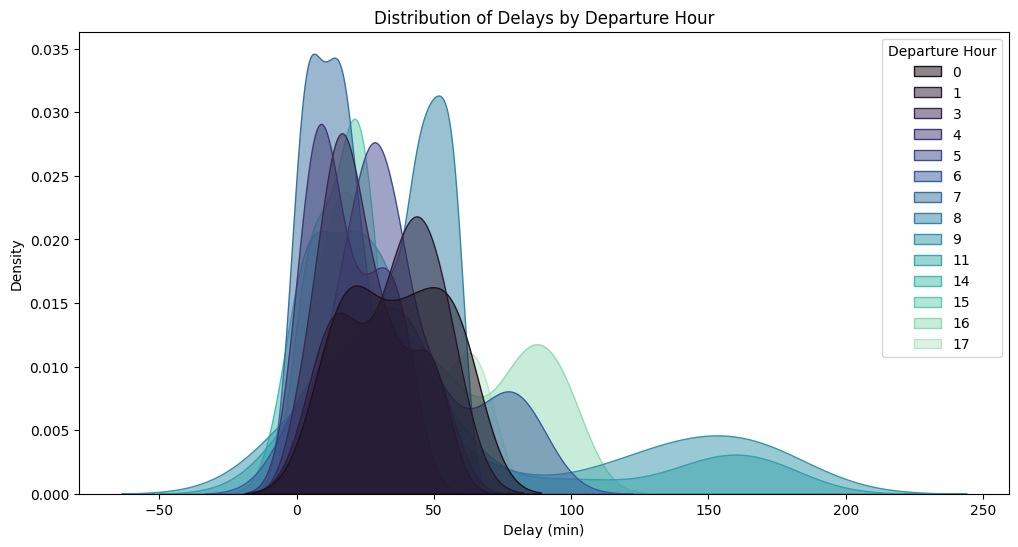

In [25]:
# Filter delayed journeys
delays = df[df['Journey Status'] == 'Delayed']

# KDE plot of delays per hour of departure
delays['Departure Hour'] = pd.to_datetime(delays['Departure Time']).dt.hour
plt.figure(figsize=(12,6))
sns.kdeplot(
    data=delays, 
    x='Delay (min)', 
    hue='Departure Hour', 
    fill=True, 
    common_norm=False, 
    alpha=0.5,
    palette=sns.color_palette("mako", n_colors=len(delays['Departure Hour'].unique()))
)
plt.title("Distribution of Delays by Departure Hour")
plt.show()

/tmp/ipykernel_69053/429629566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['Hour Rad'] = delays['Departure Hour'] * (2*np.pi/24)


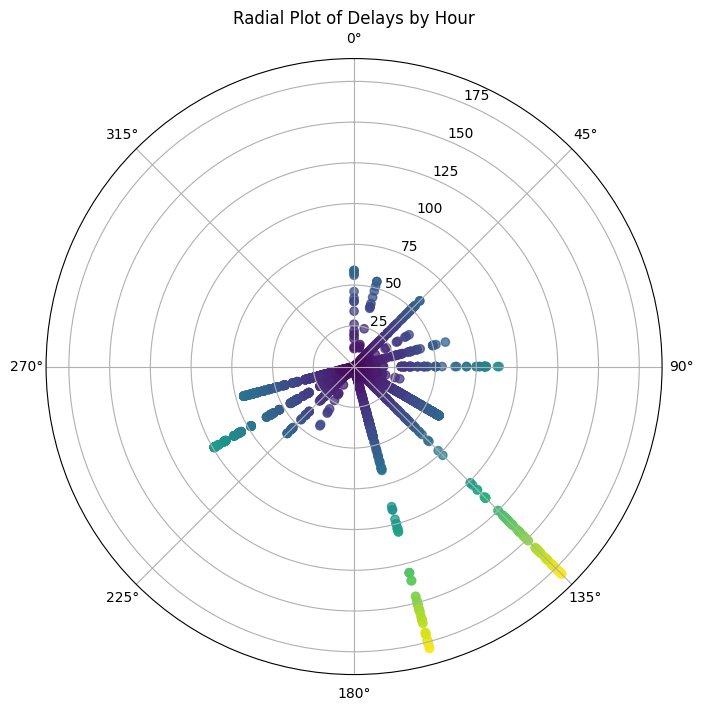

In [28]:

# Convert hour to radians
delays['Hour Rad'] = delays['Departure Hour'] * (2*np.pi/24)

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
colors = plt.cm.viridis(delays['Delay (min)']/delays['Delay (min)'].max())
ax.scatter(delays['Hour Rad'], delays['Delay (min)'], c=colors, alpha=0.75)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title("Radial Plot of Delays by Hour")
plt.show()

/media/dorgham/8c64e7bd-2128-45fc-8785-54fecee04401/Projects/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/media/dorgham/8c64e7bd-2128-45fc-8785-54fecee04401/Projects/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/media/dorgham/8c64e7bd-2128-45fc-8785-54fecee04401/Projects/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


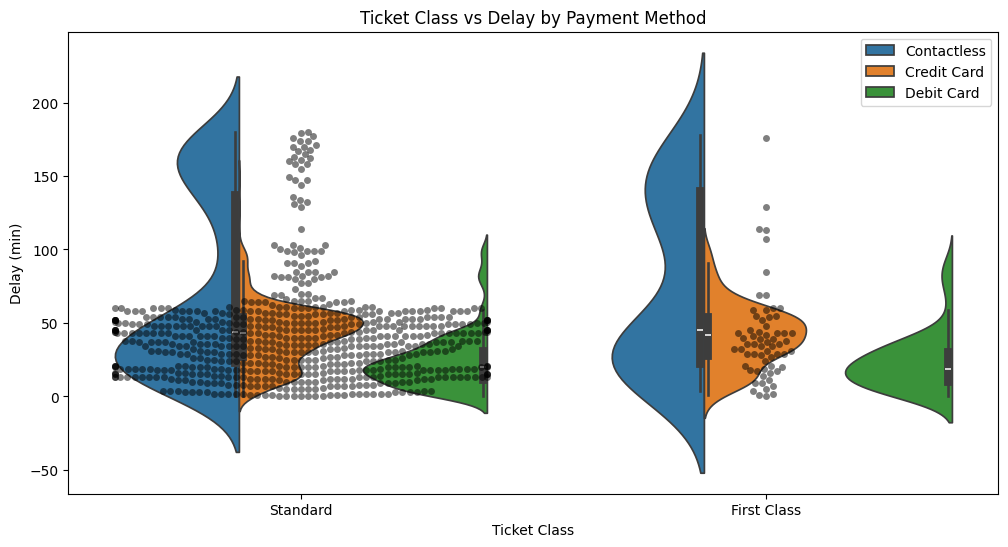

In [30]:
plt.figure(figsize=(12,6))

sns.violinplot(
    data=df, 
    x='Ticket Class', 
    y='Delay (min)', 
    hue='Payment Method', 
    split=True
)

# Sample 30% of points for the swarm plot
sns.swarmplot(
    data=df.sample(frac=0.3, random_state=42), 
    x='Ticket Class', 
    y='Delay (min)', 
    color='k', 
    alpha=0.5
)

plt.title("Ticket Class vs Delay by Payment Method")
plt.show()

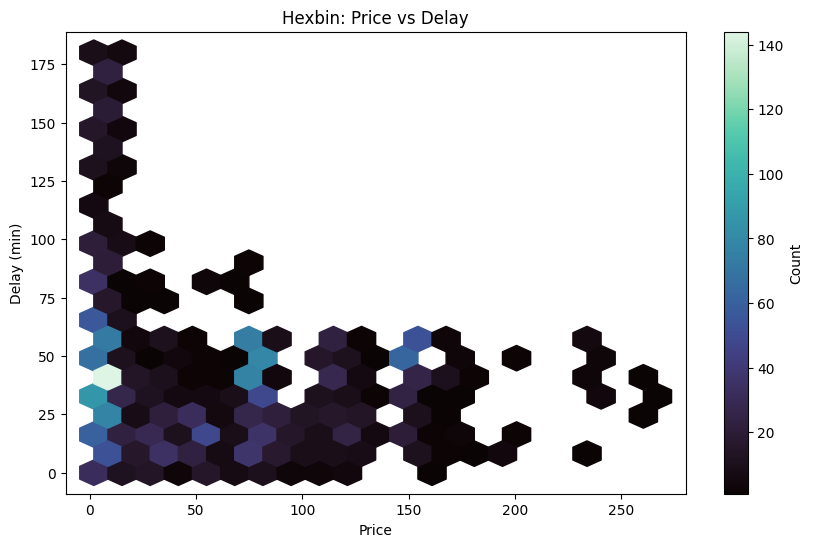

In [35]:
plt.figure(figsize=(10,6))
plt.hexbin(
    df['Price'], 
    df['Delay (min)'], 
    gridsize=20, 
    cmap='mako',
    mincnt=1
)
plt.colorbar(label='Count')
plt.xlabel("Price")
plt.ylabel("Delay (min)")
plt.title("Hexbin: Price vs Delay")
plt.show()


In [38]:
fig = px.scatter(df, x="Departure Time", y="Delay (min)", animation_frame="Date of Journey",
                 color="Ticket Class", size="Price", hover_data=['Departure Station', 'Arrival Destination'])
fig.show()

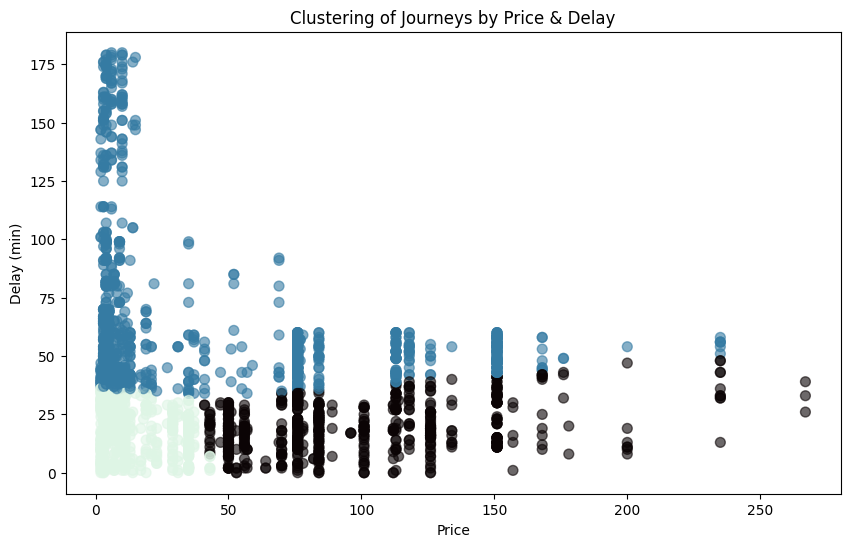

In [43]:

# Select numeric features for clustering
X = df[['Price', 'Delay (min)']].fillna(0)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(df['Price'], df['Delay (min)'], c=df['Cluster'], cmap='mako', s=50, alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Delay (min)")
plt.title("Clustering of Journeys by Price & Delay")
plt.show()